In [1]:
import pandas as pd

# -*- coding: utf-8 -*-
"""
@name: Week 3 Poisson GLM.py
@author: Ming-Long Lam, Ph.D.
@organization: University of Chicago
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas
import sys
# Set some options for printing all the columns
np.set_printoptions(precision = 10, threshold = sys.maxsize)
np.set_printoptions(linewidth = np.inf)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.options.display.float_format = '{:,.10}'.format
import seaborn as sns
import math
from scipy.stats import chi2

sys.path.append('C:\\MScAnalytics\\Linear and Nonlinear Model\\Job')
import Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

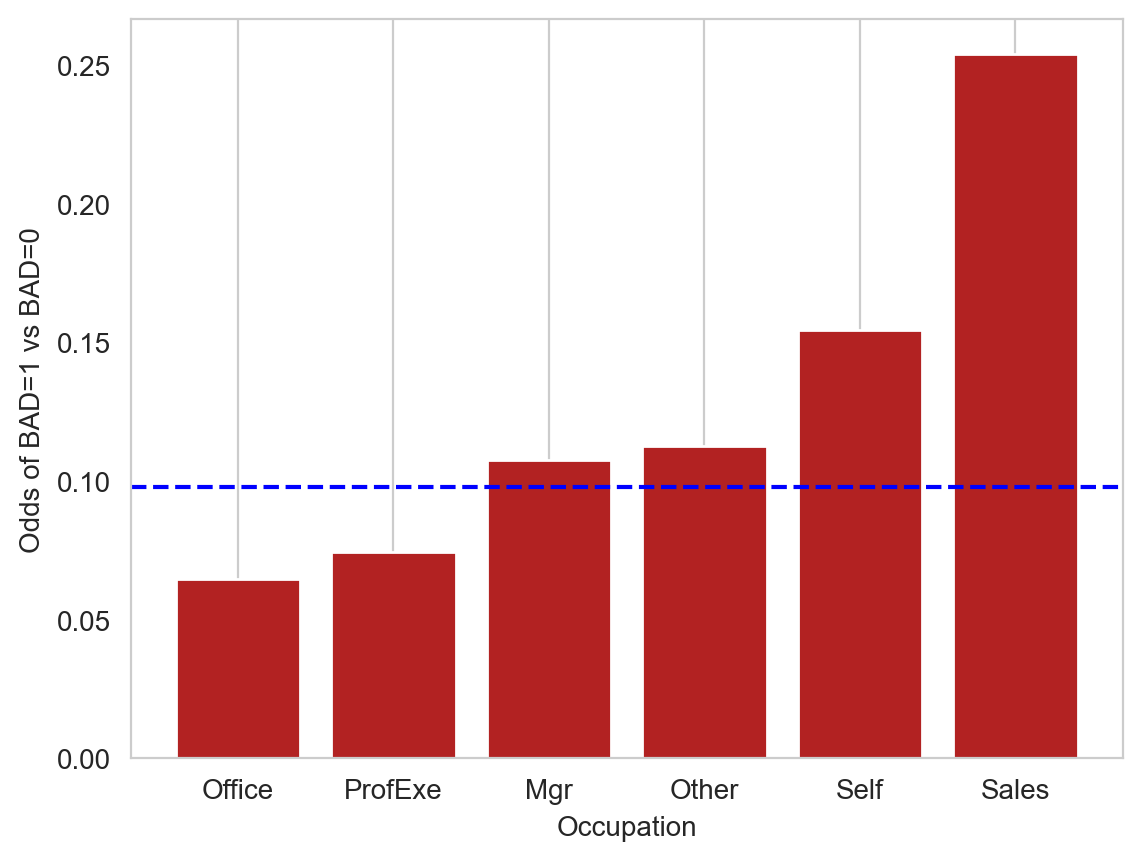

In [6]:
hmeq = pandas.read_csv('hmeq.csv')
trainData = hmeq[['JOB', 'DEBTINC', 'BAD']].dropna()
trainData.reset_index(inplace = True)
# Calculate the overall odds
yFreq = trainData.groupby('BAD').size()
overall_odds = yFreq[1] / yFreq[0]
xtab = pandas.crosstab(index = trainData['JOB'], columns = trainData['BAD'])
xtab.reset_index(inplace = True)
xtab['N'] = xtab[0] + xtab[1]
xtab['Odds'] = xtab[1] / xtab[0]
xtab.sort_values(by = 'Odds', inplace = True)
plt.figure(dpi = 200)
plt.bar(xtab['JOB'], xtab['Odds'], color = 'firebrick')
plt.axhline(y = overall_odds, color = 'blue', linestyle = '--', label = 'Overall Odds')
plt.xlabel('Occupation')
plt.ylabel('Odds of BAD=1 vs BAD=0')
plt.xticks(xtab['JOB'])
plt.grid(axis ='y')
plt.show()


In [7]:
xtab["JOB"]

1     Office
3    ProfExe
0        Mgr
2      Other
5       Self
4      Sales
Name: JOB, dtype: object